In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Create data

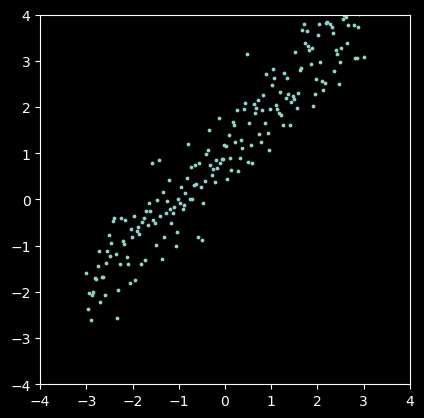

In [2]:
nPts = 200

m1 = 1
b1 = 1

x = np.linspace(-3, 3, nPts)
y = m1*x + b1 + np.random.normal(0, 0.5, nPts)
#y = 0.3*x**2 + np.random.normal(0, 0.3, nPts)
#y = np.sin(x) + np.random.normal(0, 0.3, nPts)

X = x[:,np.newaxis]

%matplotlib inline

plt.scatter(x, y, label='Data', s=3);
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().set_aspect('equal')

# Plot error function

In [3]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt

# calculate loss/error for 3d plot vs sploe and intercept
M = np.linspace(-1,3,100)
B = np.linspace(-1,3,100)

err = np.zeros((100,100))

for i,m in enumerate(M):
    for j,b in enumerate(B):
        y_pred = b*x + m
        err[i,j] = np.sum( (y-y_pred)**2 )
    # end
# end

M, B = np.meshgrid(M, B)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(M, B, err, cmap='jet')
ax.set_zlim(0,err.max())

ax.set_xlabel('M')
ax.set_ylabel('B')
ax.set_zlabel('Error')

fig.colorbar(surf, shrink=0.5, aspect=5)

# Optimize w/ simulated annealing

In [4]:
def predict(m,b,x):
    return m*x + b
# end

def loss(y, y_pred):
    return np.sum( (y-y_pred)**2 )
# end

def Temp( t, T0, tau ):
    return T0*np.exp( -(1.0*t)/tau )
# end

def SA( start, nStep, pWidth, tau, y ):
	
    y_pred = predict(start[0], start[1], x)
    
    points = [ start ]
    error   = [ loss(y,y_pred) ]
    
    r = np.random.uniform(low=0, high=1, size=nStep)
    for step in range(nStep):
        #print("step: " + str(step+1) + "/" + str(nStep))
        
        curr = points[-1]
        currF = error[-1]

        cand = np.random.normal(curr,pWidth,size=2)
        y_pred = predict(cand[0], cand[1], x)
        candF = loss( y, y_pred )
        
        if step == 0 :
            T0 = abs(candF - currF)
        # end
        T = Temp( step, T0, tau )
        
        accProb = min( 1.0, np.exp( -(candF-currF)/T ) )
        
        if( r[step] <= accProb ):
            points.append(cand)
            error.append(candF)
        else:
            points.append(curr)
            error.append(currF)
        # end
	# end
    points = np.array(points)
    error  = np.array(error)
    
    return points, error

# end

In [7]:
nStep  = 2000
tau    = 400
pWidth = 0.1
start  = [2.5,2.5]

points, error = SA( start, nStep, pWidth, tau, y )

# get results
arg_min = np.argmin(error)
x_min = points[arg_min]
f_min = np.min(error)
print(f"Minimum x: {x_min}")
print(f"Minimum f: {f_min}")

Minimum x: [0.9943337  1.03700646]
Minimum f: 55.74016250397583


# Plot annealing history

In [8]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(M, B, err, cmap='viridis')
ax.set_zlim(0,err.max())

# Add labels and title
ax.set_xlabel('M')
ax.set_ylabel('B')
ax.set_zlabel('Error')
ax.set_title('3D Surface Plot')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.plot(points[:,0],points[:,1], 'r')